# 第一部分：BFS 廣度優先搜尋

# 階段一

這次的作業是BFS廣度優先搜尋以及DFS深度優先搜尋（程式碼），同時要寫BFS以及DFS原理以及比較。

首先一開始先自己畫了流程圖，透過流程圖去思考我該怎麼去寫程式碼

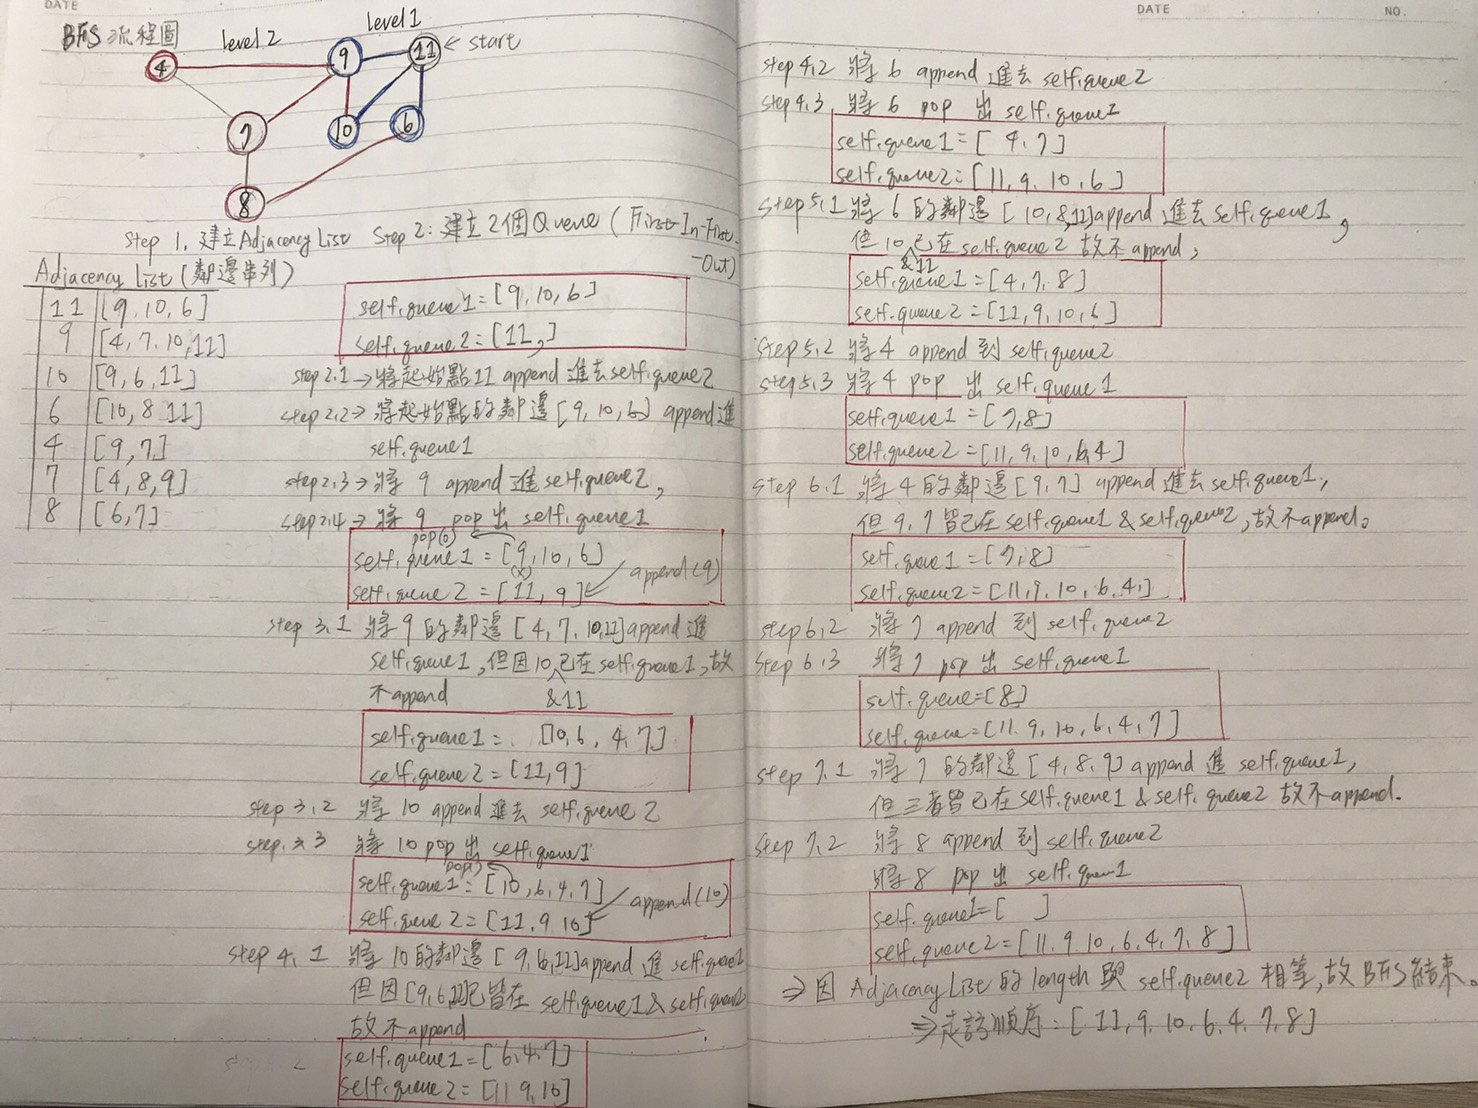

In [197]:
from IPython.display import Image
Image(filename='S__36962308.jpg')

透過畫流程圖的過程我知道我要在一開始先建立兩個空的queue，並且在一開始就將起始點append到第二個queue裡面，並且把起始點的鄰邊的list，append到第一個queue裡面，但是我在做完起始點之後發現，當我要把第二個走訪的點從第一個queue append到第二個queue且將該點從第一個queue移除的時候，接著再呼叫BFS遞迴，讓該第二個走訪的點的鄰邊append進去第一個queue，這次不像起始點直接append到第二個queue，取而代之的是透過判斷該欲走訪的頂點的鄰邊列表內的元素，有沒有已經存在在第一個queue與第二個queue裡面（因為要確認是否已經在queue1-等待區與queue2已經走訪過的區），
如果有的話，就不將該鄰邊list的元素放進來第一個queue了，沒有的話，就可以放進來，接著，就是再將第一個queue（等待區）第一個元素再 append到第二個queue（已經走訪完畢區）裡面，並且將該點從第一個queue移除，接著，對該頂點，執行再一次的遞迴，此處遞迴如同第一次將queue1元素append到queue2之後將該元素從queue1移除後，將該元素做再一次BFS遞迴相同，依此類推，直到全部走訪結束，（也是queue2長度與該頂點個數相同時。）。

畫到這裏的時候，我就在思考，怎麼樣我才能設下停止條件？設下停止條件代表就是全部走訪結束，這時候我有看網路有人用TRUE/FALSE來將頂點做走訪過後的紀錄，但是我後來想到也有一種方式，就是如果我可以透過鄰邊list 裡面的key的長度，也就是所有頂點的個數來做為我設下停止條件的依據，是否可以？也就是如果我的鄰邊list key長度不等於我的第二個queue長度，代表我要繼續進行搜尋，但是如果已經相等就代表搜尋結束，回傳第二個queue。

所以就依照這個方式開始寫程式碼。

# 虛擬碼
1.在初始化時建立兩個queue

2.從起始點開始，將正進行走訪的頂點，append到queue2，並且，將該正進行走訪的頂點的鄰邊串列append到queue1。

3.重複第二點，直到所有頂點皆已經走訪完畢。

# 階段二


### BFS原理：

建立兩個queue，幫助Graph做廣度優先搜尋。

### 第一步，先在__init__建立兩個queue分別為  self.queue1   與  self.queue2

### self.queue1：存放搜尋過頂點之鄰邊列表---->  <self.graph[s]> 

### self.queue2：存放已經搜尋過的頂點 



＃如果self.graph的長度與self.queue2長度不相等的話：                             ＃搜尋進行中的時候

   如果沒有self.queue1和self.queue2：                 ＃(處理起始點的時候）
   
       將起始點append進去self.queue2裡面
       
         如果該頂點邊的list(self.graph[s])裡面元素不在self.queue1 及 self.queue2裡面的話：
       
              對self.queue1.append(self.graph[s])（將頂點鄰邊list放進self.queue1）
            
              接著將self.queue1裡面的第一個元素append進去B裡面，
            
              將該元素定義給k
            
              接著將self.queue1第一個元素 pop 
            
              回傳  遞迴呼叫self.BFS（k）
             
    不然的話：                                    ＃（處理起始點以外的頂點的時候）
    
        如果該頂點邊的list（self.graph[s]）裡面的元素不在self.queue1 及 self.queue2裡面的話：
        
            對self.queue1.append(self.graph[s])，
            
            接著將self.queue1裡面的第一個元素append進去B裡面，
            
            將該元素定義給k
            
            接著將self.queue1第一個元素 pop 
            
            回傳  遞迴呼叫self.BFS（k）
            
＃不然的話（當self.graph的長度與self.queue2的長度相等的時候）：                    ＃搜尋結束的時候

      回傳 self.queue2






參考資料：
https://medium.com/ccclub/ccclub-python-for-beginners-tutorial-4990a5757aa6
https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/



<演算法圖鑑>


因為會用到pop但又不太了解所以這是一開始不了解 pop append 怎麼操作，所以做測試，了解 pop(0)裡面的0 代表是將該陣列的index=0 之元素清掉。

In [85]:
A=[2,5,3,4,3]
len(A)

5

In [86]:
A.pop(0)
A    

[5, 3, 4, 3]

In [78]:
A.pop(i)

IndexError: pop index out of range

# 階段三

將想法寫成程式碼

In [202]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list)
        self.queue1=[]
        self.queue2=[]
        

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
        
   
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        """
        :type s: int
        :rtype: list
        """
        
        if len(self.graph)!=len(self.queue2):
            
            if not self.queue1 and not self.queue2:#如果A和B有值 #first time
                self.queue2.append(s)
                for i in self.graph[s]:
                    if i not in self.queue1:
                        if i not in self.queue2:
                            self.queue1.append(i)
                            
                
                
                self.queue2.append(self.queue1[0])
                
                k=self.queue1[0]
                
                self.queue1.pop(0)
                
                return self.BFS(k)         
               
                
               

            else:
                
                
                for i in self.graph[s]:
                    if i not in self.queue1:
                        if i not in self.queue2:
                            
                            self.queue1.append(i)
                
                self.queue2.append(self.queue1[0])
                k=self.queue1[0]
                self.queue1.pop(0)
                return self.BFS(k)# 如果從頭 就會
                
        else:
            
            return self.queue2
    #def DFS(self, s):
        """
        :type s: int
        :rtype: list
        """
        
        
        

In [203]:
g = Graph()
g.addEdge(1,4)
g.addEdge(1,3)
g.addEdge(3,12)
g.addEdge(3,2)
g.addEdge(3,1)
g.addEdge(4,9)
g.addEdge(4,7)
g.addEdge(4,2)
g.addEdge(4,1)
g.addEdge(2,8)
g.addEdge(2,7)
g.addEdge(2,4)
g.addEdge(2,3)
g.addEdge(2,12)
g.addEdge(2,5)
g.addEdge(12,5)
g.addEdge(12,2)
g.addEdge(12,3)
g.addEdge(5,8)
g.addEdge(5,7)
g.addEdge(5,2)
g.addEdge(5,12)
g.addEdge(7,9)
g.addEdge(7,4)
g.addEdge(7,2)
g.addEdge(7,5)
g.addEdge(7,8)
g.addEdge(8,6)
g.addEdge(8,7)
g.addEdge(8,5)
g.addEdge(8,2)
g.addEdge(6,10)
g.addEdge(6,8)
g.addEdge(10,6)
g.addEdge(10,9)
g.addEdge(10,11)
g.addEdge(9,10)
g.addEdge(9,7)
g.addEdge(9,4)
g.addEdge(11,10)

print(g.BFS(11))#error:指令前應先定義A 

[11, 10, 6, 9, 8, 7, 4, 5, 2, 1, 12, 3]


成功了！

一開始，誤以為如果我把鄰邊list append到我的Ａ list時候，會在同個list內含很多的list，也就是當我在將我的Alist裡面的元素pop出來之後，準備要append進去B，並且將append進去B的元素的邊放入A裡面的時候，擔心可能會發生的狀況：
ex.
A=[2,3,4],B=[5]
A=[3,4] B=[5,2]
A要append進去2的edge的list，
擔心可能會有 A=[3,4 [4,3,2]] 的狀況。([4,3,2]是2的edge)
但是後來實驗發現，在加上 for i in A這條for-loop 判斷式之後，便可以將該list中的元素一一append進去，所以就不會發生我擔心的狀況了。

In [189]:
A=[1,2,3]

# 對照組  有加入 for i in A 其中Ａ是一串列，而此for是將 這串列元素，向前傳到i 以執行下面迴圈內判斷式

In [190]:
B=[2,3,1,6]
for i in A:
    B.append(i)
B

[2, 3, 1, 6, 1, 2, 3]

# 實驗組 沒有加入for i in A 這個單層for-loop


In [191]:
B=[2,3,1,6]#假設是準備要append（剛append進去B的元素的 edge）的A LIST
A=[1,2,3]#假設是 [（剛append進去B的元素的 edge）的list]
B.append(A)
B


[2, 3, 1, 6, [1, 2, 3]]

# 實驗發現，如果加上 for 這句判斷式會只讓該list 裡面的元素append進去，如果沒有加上這句的話，就會將整個list append進去。

# ％上網查詢 from collections import defaultdict 是什麼，以及該資料結構是以什麼形式存在，並且了解該資料結構長度以及第一個元素的操作方法。

In [66]:
from collections import defaultdict 
s = [('0', 1), ('0', 2) , ('1', 2), ('2', 0), ('2', 3), ('3', 3)]
d = defaultdict(list)
d.default_factory
#<type 'list'>
for k, v in s:
    d[k].append(v)
    
d.items()
#[('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]
#d
#defaultdict(<type 'list'>, {'blue': [2, 4], 'red': [1], 'yellow': [1, 3]})

dict_items([('0', [1, 2]), ('1', [2]), ('2', [0, 3]), ('3', [3])])

In [93]:

d['0'][0:len(d['0'])]

[1, 2]

In [132]:
len(d)

4

In [120]:
A=[]
A.append(d['0']) 
A = [x for j in A for x in j]

In [110]:
B=[]

In [111]:
B.append(A[0])

In [112]:
B

[1]

In [114]:
A.pop(0)

1

In [121]:
A

[1, 2]

# 第二部分：DFS 深度優先搜尋

深度優先搜尋，先畫個圖好了！幫助我思考程式碼！

# 階段一

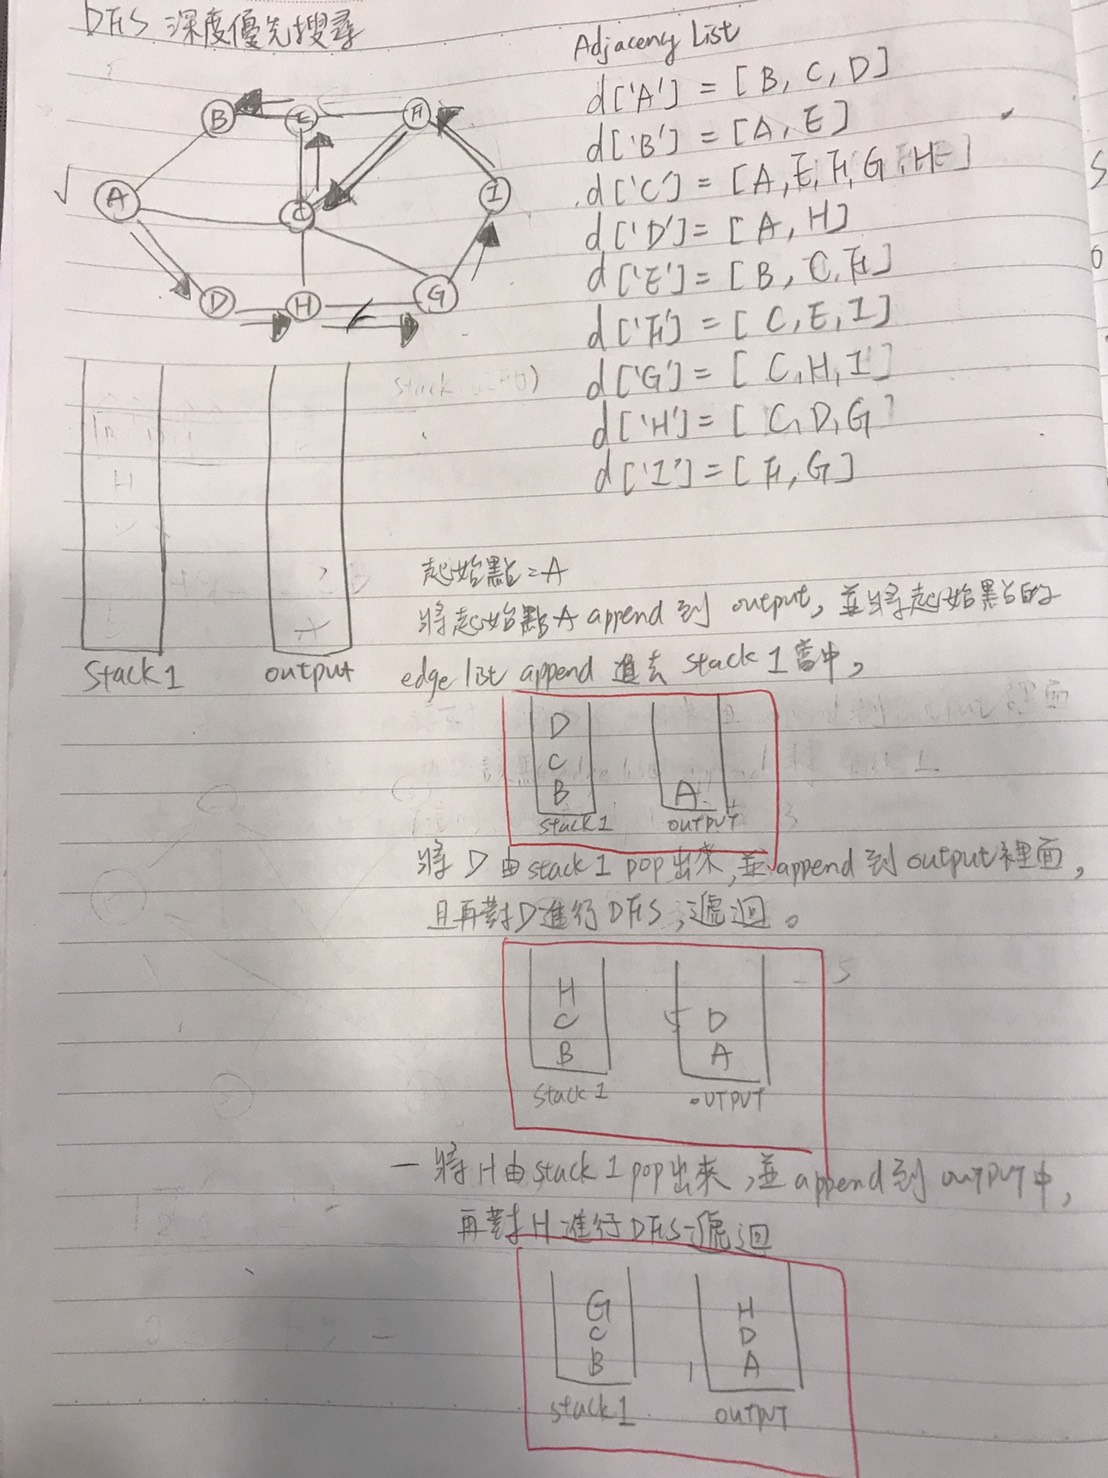

In [204]:
from IPython.display import Image
Image(filename='S__37044233.jpg') 

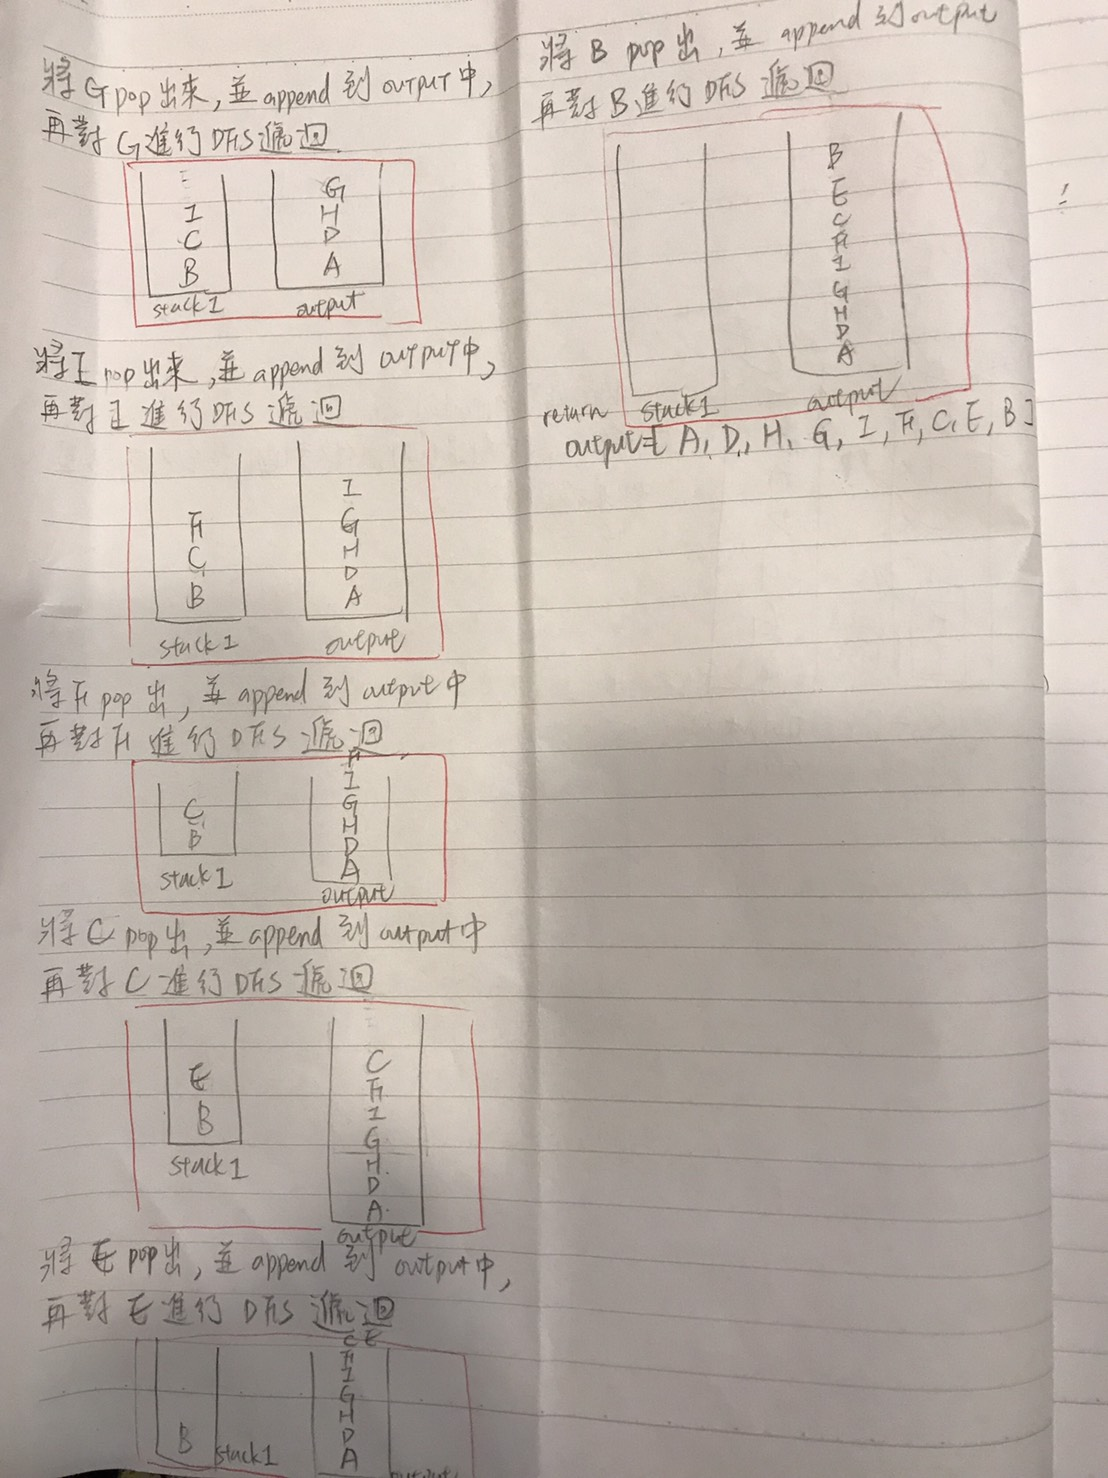

In [205]:
from IPython.display import Image
Image(filename='S__37044234.jpg') 

畫完圖，我的想法是：

可以發現初始化先建立兩個stack一個用來存放等待要被走訪的頂點，一個用來存放已經走訪過的頂點，接著，先將起始點append到第二個stack，且將該點的鄰邊串列append到第一個stack當中，再來，將第一個stack當中的index=0的元素pop出來，且append到第二個stack當中，並將該點做遞迴DFS，直到所有點都被走訪過，最後回傳第二個stack。

In [220]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list)
        self.queue1=[]
        self.queue2=[]
        self.stack1=[]
        self.stack2=[]
        

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
        
   
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        """
        :type s: int
        :rtype: list
        """
        
        if len(self.graph)!=len(self.queue2):
            
            if not self.queue1 and not self.queue2:#如果A和B有值 #first time
                self.queue2.append(s)
                for i in self.graph[s]:
                    if i not in self.queue1:
                        if i not in self.queue2:
                            self.queue1.append(i)
                            
                
                
                self.queue2.append(self.queue1[0])
                
                k=self.queue1[0]
                
                self.queue1.pop(0)
                
                return self.BFS(k)         
               
                
               

            else:
                
                
                for i in self.graph[s]:
                    if i not in self.queue1:
                        if i not in self.queue2:
                            
                            self.queue1.append(i)
                
                self.queue2.append(self.queue1[0])
                k=self.queue1[0]
                self.queue1.pop(0)
                return self.BFS(k)# 如果從頭 就會
                
        else:
            
            return self.queue2
    def DFS(self, s):
        """
        :type s: int
        :rtype: list
        """
        if len(self.graph)!=len(self.stack2):
            #keep Dfs
            if not self.stack1 and not self.stack2:
                #first time
                self.stack2.append(s)
                for i in self.graph[s]:
                    if i not in self.stack1:
                        if i not in self.stack2:
                            self.stack1.append(i)
                x=len(self.stack1)-1
                k=self.stack1[x]
                self.stack2.append(k)
                self.stack1.pop()
                return self.DFS(k)
            else:
                #second time to end
                for i in self.graph[s]:
                    if i not in self.stack1:
                        if i not in self.stack2:
                            self.stack1.append(i)
                x=len(self.stack1)-1
                k=self.stack1[x]
                self.stack2.append(k)
                self.stack1.pop()
                return self.DFS(k)
        else:
            return self.stack2
        
        
        
        
        
        
        
        
        
        
        

In [221]:
g = Graph()
g.addEdge(1,4)
g.addEdge(1,3)
g.addEdge(3,12)
g.addEdge(3,2)
g.addEdge(3,1)
g.addEdge(4,9)
g.addEdge(4,7)
g.addEdge(4,2)
g.addEdge(4,1)
g.addEdge(2,8)
g.addEdge(2,7)
g.addEdge(2,4)
g.addEdge(2,3)
g.addEdge(2,12)
g.addEdge(2,5)
g.addEdge(12,5)
g.addEdge(12,2)
g.addEdge(12,3)
g.addEdge(5,8)
g.addEdge(5,7)
g.addEdge(5,2)
g.addEdge(5,12)
g.addEdge(7,9)
g.addEdge(7,4)
g.addEdge(7,2)
g.addEdge(7,5)
g.addEdge(7,8)
g.addEdge(8,6)
g.addEdge(8,7)
g.addEdge(8,5)
g.addEdge(8,2)
g.addEdge(6,10)
g.addEdge(6,8)
g.addEdge(10,6)
g.addEdge(10,9)
g.addEdge(10,11)
g.addEdge(9,10)
g.addEdge(9,7)
g.addEdge(9,4)
g.addEdge(11,10)

print(g.BFS(11))#error:指令前應先定義A 
print(g.DFS(11))

[11, 10, 6, 9, 8, 7, 4, 5, 2, 1, 12, 3]
[11, 10, 9, 4, 1, 3, 12, 5, 8, 2, 7, 6]


# 階段二

完成了！
這裡DFS程式碼與BFS不一樣的地方：
是在於DFS是用stack來存放頂點，
所以我在一開始初始化先建立兩個stack分別為self.stack1與self.stack2。
注意：stack取與放資料的方式是後進先出（LIFO)，
     此處和BFS的queue（先進先出(FIFO))不同，
接著，是DFS的部分，

注意：如果鄰邊表的key的總長度（頂點個數），與我的第二個stack的值不同的話，則要繼續DFS

# DFS原理:

先初始化建立兩個stack self.stack1與self.stack2，

FIRST:
如果沒有第一個stack與第二個stack，則

1.把起始點append到第二個stack，且把該點的鄰邊list的頂點 append在第一個stack。

2.把第一個stack最後進來的元素pop，且append到第二個stack裡面。

3.把剛pop出來的元素做遞迴呼叫DFS。


SECOND:否則（如果該欲DFS的點非起始點）：
1.把該欲走訪的點之鄰邊list 裡面的頂點 ，做if條件判斷： 如果該點不在第一個stack且不在第二個stack的話，則append到第二個stack， 若有，則不append。

2.把第一個stack的最後一個元素pop出來，且把該點append到第二個stack。

3.對該點遞迴呼叫DFS。

4.重複1.-3.直到所有頂點都已經探訪完畢。










如果鄰邊表dict的key總長度（頂點個數），

# BFS與DFS的比較

# BFS v.s. DFS 存放元素的資料結構：
BFS：用queue存放元素。DFS：用stack存放元素

# BFS v.s. DFS 搜尋方式：
BFS:先將鄰近頂點標記為level1的進行搜尋，再將level1鄰近頂點標記為level2進行搜尋level2，接著再搜尋level3。    DFS:從起始點開始，對鄰近頂點搜尋，再對先遇到的頂點先訪問，直到所有頂點皆有被探訪過。

點深度前進直到該點沒有路，再換下條路。
# BFS v.s. DFS 記憶體空間佔用程度：
BFS:記憶體與頂點數成正比。DFS:記憶體與遞迴深度成正比，相較於BFS較省記憶體空間，因為相

較於頂點數，遞迴深度數量較少。
# BFS v.s. DFS 時間複雜度:

BFS:O(ElogE)。DFS:O(ElogE)

參考資料：
老師投影片DFS,BFS
https://docs.google.com/presentation/d/e/2PACX-1vTma_vOZyE70O23KWw4I4Y78aAaT5fJSTq7Mae912kCwka_u5ZMWPoo14D86-x-57kZPbb6hAGktSW4/pub?start=false&loop=false&delayms=3000&slide=id.g7a5d8b85ee_0_23

https://www.youtube.com/watch?v=f_lLannWfrM&feature=youtu.be 老師上課影片

http://210.71.78.162/doc/203.pdf


https://medium.com/ccclub/ccclub-python-for-beginners-tutorial-4990a5757aa6

https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/